In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2.16 (Numerical precision) :
Implement exercise 2.4 in order to observe all the behaviours described in the lecture for EE and EI with finite precision or not.

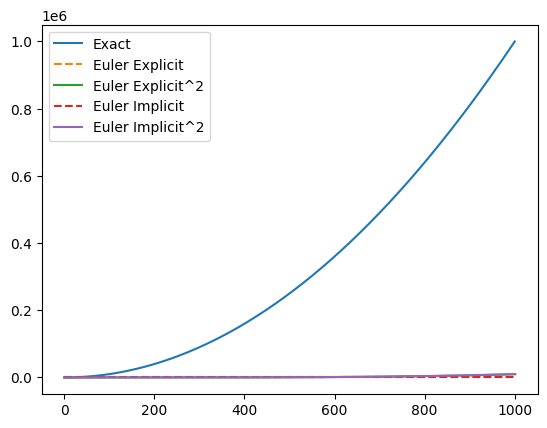

In [2]:
def f(x):
    return 2*np.abs(x)**(1/2)

def EE(x0,t,f,h):
    U0 = x0
    U = [U0]
    for _ in range(t.size+1):
        U0 = U0 + h*f(U0)
        U.append(U0)
    return np.array(U)

def EI(x0,t,h):
    U0 = x0
    U = [U0]
    for _ in range(t.size+1):
        U0 = U0 + 2*h*(h + np.sqrt(h**2 + U0))
        U.append(U0)
    return np.array(U)

x0 = 1e-150
h = 0.01
t = np.linspace(0,1000,1000)


U1 = EE(x0,t,f,h)
U2 = EI(x0,t,h)
sol = lambda t,lam: (t-lam)**2 * (t>=lam)

plt.plot(t,sol(t,0),label='Exact')

plt.plot(U1,label='Euler Explicit',linestyle='--')
plt.plot(U1**2,label='Euler Explicit^2')
plt.plot(U2,label='Euler Implicit',linestyle='--')
plt.plot(U2**2,label='Euler Implicit^2')
plt.legend()   
plt.show()

# Exercice 2.19 (SIR model scheme order):
Write a program that solves the SIR system (2.42)-(2.44) using the Euler Explicit, Heun, and Runge-Kutta schemes of order 4 with Butcher table (2.30). Take as an example S_0 = 10.0^6, I_0 = 10, R_0 = 0 (but work with the proportions of the total population), r = 0.5, a = 0.33, T = 150.0, N = 150 (h = T /N).

1. Implement it using the ”odeint” function in python (without any scheme).

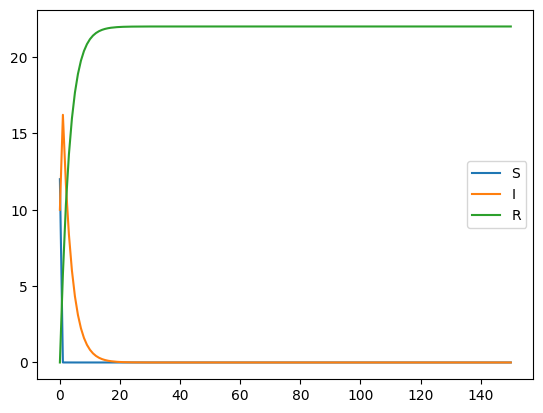

In [3]:
# Parameters:
S0, I0, R0 = 10^6, 10, 0
r, a = 0.5, 0.33
T = 150
N = 150

y0 = np.array([S0, I0, R0])
t = np.linspace(0, T, N+1)

def f(y,t):
    S, I, R = y
    dS = -r*S*I
    dI = r*S*I - a*I
    dR = a*I
    return np.array([dS, dI, dR])

from scipy.integrate import odeint

y = odeint(f, y0, t)

plt.plot(t, y[:,0], label='S')
plt.plot(t, y[:,1], label='I')
plt.plot(t, y[:,2], label='R')
plt.legend()


2. Study the order of the schemes by varying h and comparing it with the solution found by ’odeint’ at time T (take the error on ”S”). For this study, take T0 = 52,T = 60 (get the initial values at time T0 from the previous calculation) and h = 0.05, 0.01, 0.1, 0.5, 1, 2, 4. The result should be similar to that in figure 2.2.

In [32]:
import numpy as np

def ee(f, y0, t, h):
    """Euler Explicit method"""
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] + h * f(y[i], t[i])
    return y

def heun(f, y0, t, h):
    """Heun's method (Improved Euler)"""
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + h * k1, t[i+1])
        y[i+1] = y[i] + h / 2 * (k1 + k2)
    return y

def rk4(f, y0, t, h):
    """Runge-Kutta 4th order method"""
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + h / 2 * k1, t[i] + h / 2)
        k3 = f(y[i] + h / 2 * k2, t[i] + h / 2)
        k4 = f(y[i] + h * k3, t[i+1])
        y[i+1] = y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

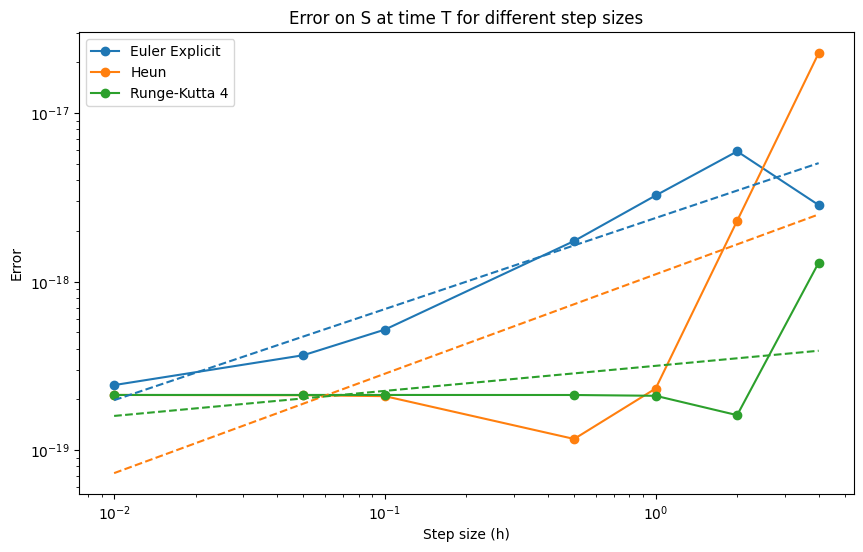

In [56]:
T0 = 52
T = 60

y0_T0 = y[T0]
t_new = t[T0:T+1]
y_exact = odeint(f, y0_T0, t_new)

h_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 4]

errors_ee = []
errors_heun = []
errors_rk4 = []

for h in h_values:
    t_new = np.linspace(T0, T, int((T - T0) / h) + 1)
    
    # Euler Explicit
    y_ee = ee(f, y0_T0, t_new, h)
    errors_ee.append(np.abs(y_ee[-1, 0] - y_exact[-1, 0]))
    
    # Heun's method
    y_heun = heun(f, y0_T0, t_new, h)
    errors_heun.append(np.abs(y_heun[-1, 0] - y_exact[-1, 0]))
    
    # Runge-Kutta 4th order
    y_rk4 = rk4(f, y0_T0, t_new, h)
    errors_rk4.append(np.abs(y_rk4[-1, 0] - y_exact[-1, 0]))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors_ee, label='Euler Explicit', marker='o') 
plt.loglog(h_values, errors_heun, label='Heun', marker='o')
plt.loglog(h_values, errors_rk4, label='Runge-Kutta 4', marker='o')

# Fit a line to the errors
p_ee = np.polyfit(np.log(h_values), np.log(errors_ee), 1)
p_heun = np.polyfit(np.log(h_values), np.log(errors_heun), 1)
p_rk4 = np.polyfit(np.log(h_values), np.log(errors_rk4), 1)

plt.loglog(h_values, np.exp(p_ee[1]) * h_values**p_ee[0], linestyle='--', color='C0')
plt.loglog(h_values, np.exp(p_heun[1]) * h_values**p_heun[0], linestyle='--', color='C1')
plt.loglog(h_values, np.exp(p_rk4[1]) * h_values**p_rk4[0], linestyle='--', color='C2')


plt.legend()
plt.title('Error on S at time T for different step sizes')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.show()

3. Study the impact of control policies that will change r and a.